In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import datetime as datetime

# normal distribution of variables
# multicollinearity of variables
# ANOVA == F-test (statistical significance of difference between means, variances)

In [ ]:
data = pd.read_csv("pressure_PV_data.csv", low_memory = False) #low_memory handles heterogeneous data
#data.dtypes

data.shape
#data.info

# 1st check

In [ ]:
#data.describe()
#data.isnull()

data.isnull().apply(sum, axis = 0) #each column with count of NaN
#data.isnull().apply(sum, axis = 1) #each row with count of NaN 

In [ ]:
#data.dropna(axis = 1, how = 'any')
#data.dropna(axis = 1, how = 'all')

#data.index

# 1st stage of filtration

In [ ]:
thresh1 = (len(data) - (5/100)*len(data))

for col1 in data:
    if sum(data[col1].isnull()) >= thresh1:
        data.drop(col1, axis = 1, inplace = True)
        
#data.head()
len(data.columns), len(data)

# 2nd stage of filtration

In [ ]:
#data.select_dtypes(exclude = 'number')
#data.select_dtypes(include = 'number')

#(data == 0).sum()

In [ ]:
for col2, zeros in ((data == 0).sum()).items():
    if zeros > 100 and zeros < 1000:
        print(col2, zeros)

In [ ]:
thresh2 = (50/100)*len(data)

for col2, zeros in ((data == 0).sum()).items():
    if zeros > thresh2:
        print(col2, zeros)

In [ ]:
for col2, zeros in ((data == 0).sum()).items():
#    if zeros > 0:
#        print(col, zeros)
    if zeros > thresh2:
        data.drop(col2, axis = 1, inplace = True)
    
len(data.columns)

In [ ]:
#data.to_csv('new_PV_data.csv')
#import pandas as pd

#df = pd.read_csv("new_PV_data.csv", low_memory = False)
#df.shape

# 3rd stage of filtration

In [ ]:
#(data.astype('str')).sum()

In [ ]:
##Datetime (or date) +1
#sum(data.dtypes == 'object')
#(data.dtypes == 'object').sum()
#list(data.dtypes == 'object')

#data.dtypes == 'object'
#for vals in (data.dtypes == 'object'):
#        print(vals)
        
n = len(data.columns)
col = data.columns

col3 = []
for j, vals in enumerate(data.dtypes == 'object'):
    if vals == True:
        col3.append(col[j])
#        print(j, col[j], vals)

#len(col3)
col3.pop(-1)
#len(col3)

data.drop(col3, axis = 1, inplace = True)

In [ ]:
len(data.columns)

In [ ]:
#cols_plot1 = data.columns[0:12]
#cols_plot1

##axes = data[cols_plot].plot(marker = '.', alpha = 0.5, linestyle = 'None', figsize = (12, 9), subplots = True)
#axes = data[cols_plot1].plot(alpha = 1.0, figsize = (12, 9), subplots = True)

##for ax in axes:
##    ax.set_ylabel('')

In [ ]:
#data.plot(legend = False)

#data.plot(subplots = True, legend = False)
#pyplot.show()

#data != 0

#(data != 0).any(axis = 0)
#data.loc[:, (data != 0).all(axis = 0)]

#cols_no_use = ['BS:PI-0017-032-A__PV_RW', 'BS:PI-0017-032-B__PV_RW', 'BS:PI-0017-030-B__PV_RW']
#len(cols_no_use)

In [ ]:
#cols_plot2 = data.columns[12:22]
#cols_plot2

#axes = data[cols_plot2].plot(alpha = 1.0, figsize = (12, 9), subplots = True)

#cols_no_use = ['BS:PI-0018-032-A__PV_RW', 'BS:PI-0018-032-B__PV_RW', 'BS:PI-0018-030-A__PV_RW']
#len(cols_no_use)

#df.drop(cols_no_use, inplace = True, axis = 1)

In [ ]:
#df.to_csv('newer_PV_data.csv')

#data = pd.read_csv("newer_PV_data.csv", low_memory = False)
#data.shape

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

In [ ]:
cols_plot1 = data.columns[0:23]
cols_plot2 = data.columns[23:45]

In [ ]:
cols_plot3 = data.columns[45:53]
axes = data[cols_plot3].plot(alpha = 1.0, figsize = (12, 9), subplots = True)

In [ ]:
#axes = data[cols_plot1].plot(alpha = 1.0, figsize = (15, 12), subplots = True)
#axes = data[cols_plot2].plot(alpha = 1.0, figsize = (15, 12), subplots = True)

In [ ]:
data.columns[0:45]

In [ ]:
cols_plot3 = data.columns[45:53]

data.drop(cols_plot3, axis = 1, inplace = True)
len(data.columns)

In [ ]:
#from pandas import read_csv
#from matplotlib import pyplot

#series = read_csv('pressure_PV_data.csv', low_memory = False, header = 0, index_col = 0, parse_dates = True, squeeze = True)
#series.plot(style = 'k.') 
#series.plot(style = 'k-')
#series.plot(subplots = True)
#series.plot(legend = False)
#pyplot.show()

# 4th stage of filtration

In [2]:
#data.to_csv('new_pressure_data.csv')

data = pd.read_csv("filtered_pressure_data.csv", low_memory = False)
data.shape

(52490, 26)

In [3]:
df = data.drop(['datetime'], axis = 1)

#sns.set(style = "ticks", color_codes = True)
#sns.pairplot(df, diag_kind = 'kde')

In [ ]:
#from matplotlib import pyplot

In [ ]:
#sns.set(style = "whitegrid")
#pyplot.figure(figsize = (15, 12))
#sns.boxplot(data = df)

In [4]:
correlations = df.corr(method = 'spearman')

#corr_matrix = df.corr(method = 'spearman').abs()
#correlations.style.background_gradient(cmap = 'coolwarm').set_precision(2)

In [ ]:
#pyplot.figure(figsize = (12, 9))
#sns.heatmap(correlations, annot = True)

In [5]:
upper = correlations.where(np.triu(np.ones(correlations.shape), k = 1).astype(np.bool))
upper

,BS:PI-0016-060-B__PV_RW,BS:PI-0017-031-A__PV_RW,BS:PI-0017-050-B__PV_RW,BS:PI-0017-060-B__PV_RW,BS:PI-0018-030-B__PV_RW,BS:PI-0018-031-A__PV_RW,BS:PI-0018-050-B__PV_RW,BS:PI-0018-060-B__PV_RW,BS:PI-0019-030-B__PV_RW,BS:PI-0019-031-A__PV_RW,...,BS:PI-0020-050-B__PV_RW,BS:PI-0020-060-B__PV_RW,BS:PI-0021-031-A__PV_RW,BS:PI-0021-032-A__PV_RW,BS:PI-0021-050-B__PV_RW,BS:PI-0021-060-B__PV_RW,BS:PI-0022-030-B__PV_RW,BS:PI-0022-031-A__PV_RW,BS:PI-0022-050-B__PV_RW,BS:PI-0022-060-B__PV_RW
BS:PI-0016-060-B__PV_RW,NaN,0.438995,0.222190,0.427476,0.344821,0.748340,0.604653,0.764613,-0.116007,-0.067829,...,0.142778,0.160364,0.318318,0.031165,0.333074,0.419276,0.233012,0.060216,-0.223832,0.044214
BS:PI-0017-031-A__PV_RW,NaN,NaN,-0.072842,0.891278,0.118547,0.253977,0.059708,0.366105,0.042967,0.131163,...,0.230071,0.128449,0.549793,-0.121286,0.231931,0.560885,0.241805,-0.118318,-0.191658,-0.052883
BS:PI-0017-050-B__PV_RW,NaN,NaN,NaN,-0.179598,0.364377,0.360583,0.471534,0.380271,0.159483,0.227985,...,0.078906,0.004888,-0.100416,0.239077,-0.310111,0.047258,0.056695,0.022486,-0.112904,0.084909
BS:PI-0017-060-B__PV_RW,NaN,NaN,NaN,NaN,-0.056574,0.165083,-0.049840,0.318235,0.139619,0.192869,...,0.213365,0.213935,0.572951,-0.152108,0.246139,0.489861,0.205386,-0.173058,-0.191874,-0.117354
BS:PI-0018-030-B__PV_RW,NaN,NaN,NaN,NaN,NaN,0.682427,0.820132,0.612281,-0.391333,-0.410254,...,-0.091299,0.014670,0.049228,0.279564,-0.011513,0.127721,0.305350,-0.060448,-0.094845,-0.066530
BS:PI-0018-031-A__PV_RW,NaN,NaN,NaN,NaN,NaN,NaN,0.848468,0.852338,-0.321993,-0.309965,...,0.082904,0.044051,0.220984,0.153331,0.228416,0.362211,0.253905,0.113443,-0.094647,0.043964
BS:PI-0018-050-B__PV_RW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.798233,-0.331167,-0.363108,...,-0.074484,0.027443,0.034740,0.312672,0.062802,0.167087,0.261996,-0.039302,-0.129951,-0.089459
BS:PI-0018-060-B__PV_RW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079521,-0.117828,...,-0.030593,0.074374,0.158464,0.285474,0.125357,0.234274,0.294164,-0.150250,-0.283574,-0.164328
BS:PI-0019-030-B__PV_RW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.880004,...,-0.144580,0.129155,-0.005715,-0.056483,-0.112141,-0.078521,-0.080650,-0.299507,-0.385356,-0.100307
BS:PI-0019-031-A__PV_RW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.018306,0.107284,0.057645,-0.053374,-0.121635,-0.003953,-0.006134,-0.299644,-0.231690,-0.133217


In [6]:
#Drop highly correlated (value = 0.55) columns only

to_drop = [column for column in upper.columns if any(upper[column] > 0.55)]
to_drop

['BS:PI-0017-060-B__PV_RW',
 'BS:PI-0018-031-A__PV_RW',
 'BS:PI-0018-050-B__PV_RW',
 'BS:PI-0018-060-B__PV_RW',
 'BS:PI-0019-031-A__PV_RW',
 'BS:PI-0019-032-A__PV_RW',
 'BS:PI-0019-032-B__PV_RW',
 'BS:PI-0020-031-A__PV_RW',
 'BS:PI-0021-031-A__PV_RW',
 'BS:PI-0021-060-B__PV_RW',
 'BS:PI-0022-060-B__PV_RW']

In [ ]:
#df.drop(to_drop, axis = 1, inplace = True)
#df.shape

In [ ]:
#new_correlations = df.corr(method = 'spearman')

#new_correlations.style.background_gradient(cmap = 'coolwarm').set_precision(2)

In [7]:
data = pd.read_csv("correlated_pressure_data.csv", low_memory = False)
data.shape

(52490, 12)

In [9]:
data['date'] = pd.to_datetime(data['datetime'])
data = data.set_index('date')
data = data.drop('datetime', axis = 1)
data = data.sort_index()

#data.head()

,BS:PI-0017-060-B__PV_RW,BS:PI-0018-031-A__PV_RW,BS:PI-0018-050-B__PV_RW,BS:PI-0018-060-B__PV_RW,BS:PI-0019-031-A__PV_RW,BS:PI-0019-032-A__PV_RW,BS:PI-0019-032-B__PV_RW,BS:PI-0020-031-A__PV_RW,BS:PI-0021-031-A__PV_RW,BS:PI-0021-060-B__PV_RW,BS:PI-0022-060-B__PV_RW
date,,,,,,,,,,,
2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#axes = data[data.columns].plot(alpha = 1.0, figsize = (15, 12), subplots = True, legend = False)
#axes = data[data.columns].plot(alpha = 1.0, figsize = (15, 12), subplots = True)

# Correlated data

In [25]:
#data = pd.read_csv("ranja1.csv", low_memory = False)
data = pd.read_csv("correlated_data.csv", low_memory = False)
data.shape

(52490, 12)

In [26]:
data['datetime'] = pd.to_datetime(data['date'])
data = data.set_index('datetime')
data = data.drop('date', axis = 1)
data = data.sort_index()

In [14]:
#axes = data[data.columns].plot(alpha = 1.0, figsize = (15, 12), subplots = True)

In [27]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.weekday_name

In [28]:
import matplotlib.pyplot as plt

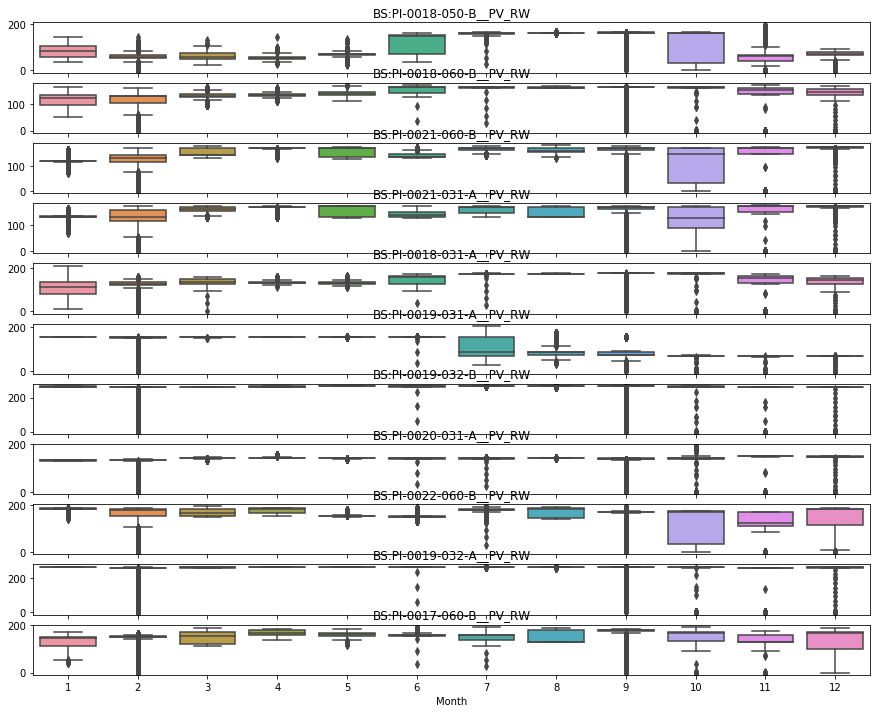

In [29]:
fig, axes = plt.subplots(11, 1, figsize = (15, 12), sharex = True)
for name, ax in zip(data.columns, axes):
    sns.boxplot(data = data, x = 'Month', y = name, ax = ax)
    ax.set_ylabel('')
    ax.set_title(name)
    ax.set_xlabel('')
    if ax == axes[-1]:
        ax.set_xlabel('Month')

# Uncorrelated data

In [9]:
data = pd.read_csv("ranja.csv", low_memory = False)
data.shape

(52490, 15)

In [10]:
data['datetime'] = pd.to_datetime(data['date'])
data = data.set_index('datetime')
data = data.drop('date', axis = 1)
data = data.sort_index()

In [11]:
#axes = data[data.columns].plot(alpha = 1.0, figsize = (15, 12), subplots = True, legend = False)
#axes = data[data.columns].plot(alpha = 1.0, figsize = (15, 12), subplots = True)

In [12]:
to_drop = ['BS:PI-0021-050-B__PV_RW']
data.drop(to_drop, axis = 1, inplace = True)

In [13]:
#data.columns

In [14]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.weekday_name

## Display a random sampling of 5 records
#data.sample(5, random_state = 0)
#data.head()

In [15]:
import matplotlib.pyplot as plt

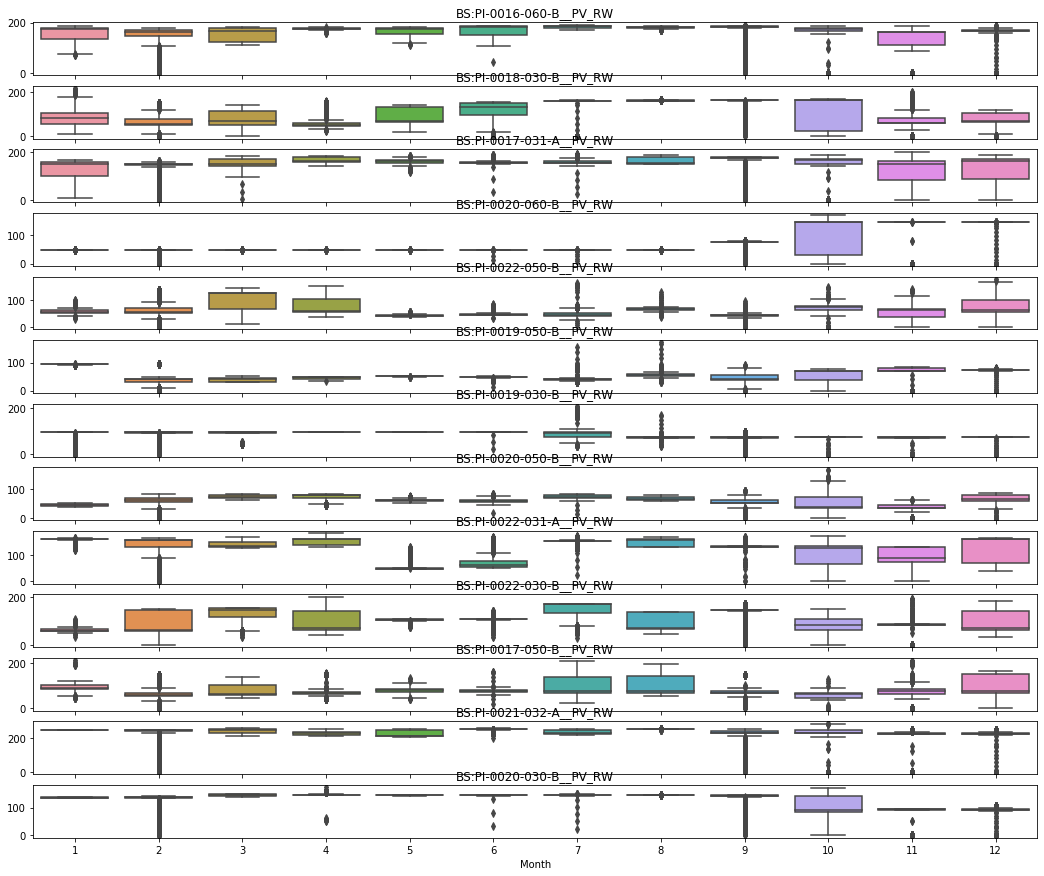

In [20]:
fig, axes = plt.subplots(13, 1, figsize = (18, 15), sharex = True)
for name, ax in zip(data.columns, axes):
    sns.boxplot(data = data, x = 'Month', y = name, ax = ax)
    ax.set_ylabel('')
    ax.set_title(name)
    ax.set_xlabel('')
    if ax == axes[-1]:
        ax.set_xlabel('Month')
